# Deep Learning with TensorFlow and Keras

Keras is a high-level API of the TensorFlow, which provides approachable and highly-productive interface for solving machine learning (ML) problems. It covers the whole ML workflow from data processing to hyperparameter tuning to deployment and enables fast experimentation.

### 1) Set Up TensorFlow and Keras

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

2.9.0


### 2) Simple (1 layer - 1 neuron) Neural Network

The simplest possible neural network is one with only a single layer with one neuron and has the input shape of a single value as shown in the figure below:

<img src="../image/nn_1_1.png" alt="one layer one neuron neural network" width="600">

Let's assume we are given two sets of data:
```python
x = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
y = [-4.0, -1.0, 2.0, 5.0, 8.0, 11.0]
```
and we want to find the rule behind them which is:
```python
y = 3x + 2
```
#### a) Define the Model and Compile the Neural Network

Keras [Sequential](https://keras.io/api/models/sequential/) class allows to group a linear sequence of layers into a model. The simplest neural network with a single layer can be built with a single [dense](https://keras.io/api/layers/core_layers/dense/) layer, which is the densely-connected neural network layer.


In [18]:
# build a simple sequential model with a dense layer
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

To compile the neural network, a __loss__ function and an __optimizer__ are needed. During the training process, the __loss__ function calculates the loss by comparing the actual values to the predicted values. On the other hand, the __optimizer__ updates the weights of the neural network for a new prediction to minimize the loss. They work in turns for the selected number of __epochs__. Keras API provides a list of available [loss](https://keras.io/api/losses/) functions and [optimizer](https://keras.io/api/optimizers/)s.

In [19]:
# compile the model with sgd optimizer and MSE loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

#### b) Train the Neural Network

To train the model, labeled data is prepared in pairs as input and output values. The values, which are float number in this case, are prepared as numpy arrays.

In [20]:
# inputs and outputs for model training
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0], dtype=float)
y = np.array([-4.0, -1.0, 2.0, 5.0, 8.0, 11.0], dtype=float)

The ```.fit()``` function is called over the model to train the neural network. By going through the training turns, the model learns the relationship between input and output values. The training loops depends on the number of epochs, which is set by the __epoch__ parameter.

In [21]:
# train the model
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 373ms/step - loss: 41.6561
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 36.5087
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 32.0090
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 28.0752
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 24.6357
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 21.6280
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 18.9975
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 16.6966
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 14.6835
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9220
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 11.3802
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 10.0305
Epoch 13/300
1/1 [=====================

When the model is trained with the labeled data, ```.predict()``` method is used to make new predictions for unlabeled data.

In [22]:
# make a prediction
print(model.predict([20.0]))

1/1 [==============================] - 0s 132ms/step
[[62.019344]]


Using the formula below:
```python
y = 3(20) + 2
```
The expected answer would be 62 for the input value 20. Neural networks work with probabilities and the data size as well as other criteria (number of epochs, optimizer, loss function) in this example resulted in model prediction close to true value, but not the exact value. With neural networks, not certainties but probabilities should be considered for prediction and particularly classification tasks.

### 3) Dense Neural Network

A dense neural network (DNN), also known as a fully connected neural network, is a machine learning model in which every neuron in one layer is fully connected to every neuron in the previous layer. DNNs are widely used for classification, regression, and other tasks that require a complex, non-linear mapping between inputs and outputs. They work well with numerical or structural data.

#### a) Load and Prepare the Data

DNNs can be used to perform some computer vision tasks such as classification. The __Fashion MNIST__ dataset, which is available in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API, is a collection of grayscale 28x28 pixel clothing images which is suitable for a basic classification task. The ```.load_data()``` method allows to load the data from the API and returns two tuples with data and labels. The labels are returned as a number list which maps as below:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

While working with visual data and training a neural network for image processing, it is usually better to normalize the pixel values by scaling to (0, 1). EXPLAIN MORE!

Label: 6


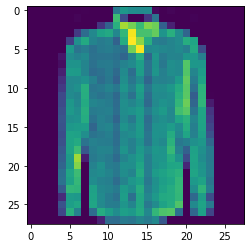

In [35]:
# load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# load and split the training and test sets of the Fashion MNIST dataset
(train_img, train_lab), (test_img, test_lab) = fmnist.load_data()

# set number of characters per row when printing
#np.set_printoptions(linewidth=320)

# pick a random image from the dataset
i = np.random.randint(train_lab.shape[0], size=1)[0]

# print image and label of the randomly selected sample
print("Label:", train_lab[i])
#print("Image as NumPy array: \n", train_img[i])

# visualize the image
plt.imshow(train_img[i])

# normalize the pixel values from (0, 255) to (0, 1)
train_img  = train_img / 255.0
test_img = test_img / 255.0

#### b) Define the Model and Compile the Neural Network

Keras [Dense](https://keras.io/api/layers/core_layers/dense/) layers are used in a sequential order to create DNNs. Explain activation and flatten!

In [36]:
# build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_lab, epochs=5)